In [10]:
%pip install fastf1

In [11]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import numpy as np
import pandas as pd

In [12]:
#ff1.Cache.enable_cache('../cache')

In [13]:
YEAR = 2025
RACE = 'Hungary'
SESSION = 'R'

session_race = ff1.get_session(YEAR, RACE, SESSION)
session_race.load()

core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.6.0]
INFO:fastf1.fastf1.core:Loading data for Hungarian Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core     

In [14]:
MAX, OCON, GASLY = 'VER', 'OCO', 'GAS'

In [15]:
laps = session_race.laps

MAX_laps = laps.pick_drivers(MAX)
OCON_laps = laps.pick_drivers(OCON)
GASLY_laps = laps.pick_drivers(GASLY)

MAX_fastest = MAX_laps.pick_fastest()
OCON_fastest = OCON_laps.pick_fastest()
GASLY_fastest = GASLY_laps.pick_fastest()

MAX_car_data = MAX_fastest.get_car_data()
OCON_car_data = OCON_fastest.get_car_data()
GASLY_car_data = GASLY_fastest.get_car_data()

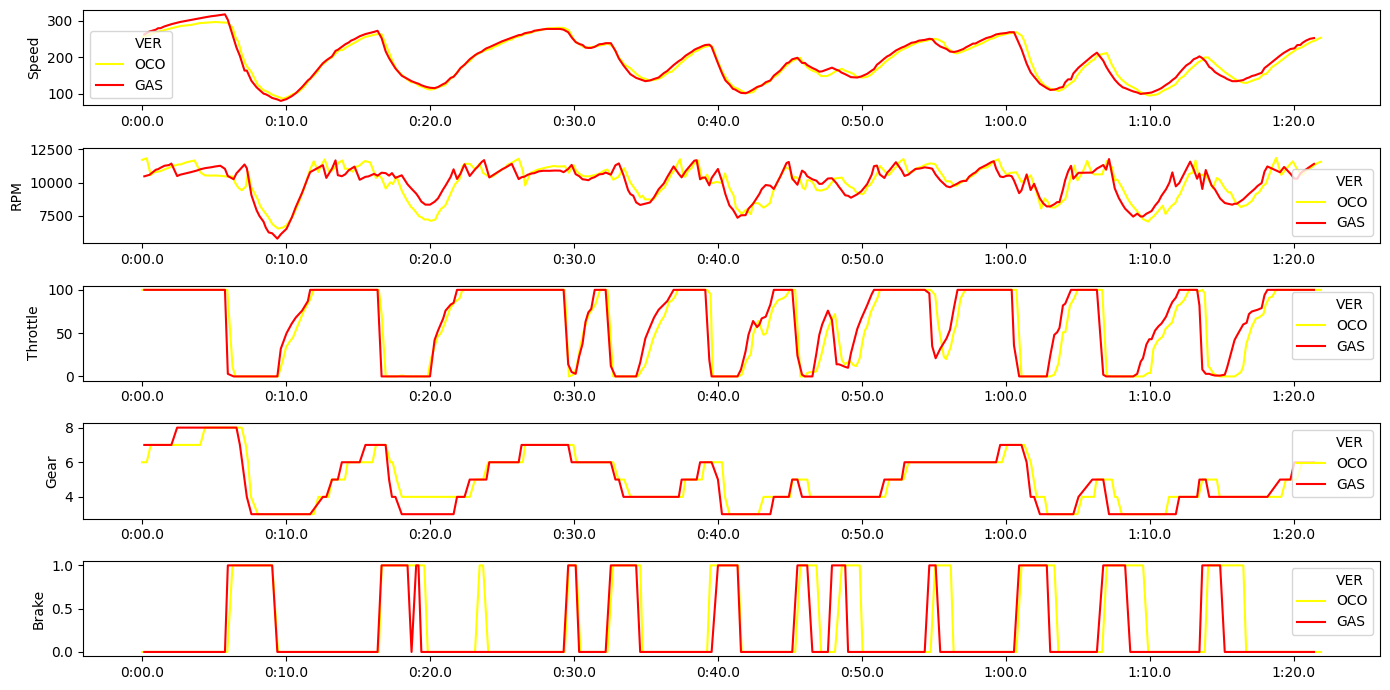

In [16]:
plotting.setup_mpl()

fig, ax = plt.subplots(5, figsize=(14, 7))

MAX_color, OCON_color, GASLY_color = "white", "yellow", "red"

ax[0].plot(MAX_car_data['Time'], MAX_car_data['Speed'], color=MAX_color, label=MAX)
ax[0].plot(OCON_car_data['Time'], OCON_car_data['Speed'], color=OCON_color, label=OCON)
ax[0].plot(GASLY_car_data['Time'], GASLY_car_data['Speed'], color=GASLY_color, label=GASLY)
ax[0].legend()
ax[0].set_ylabel('Speed')

ax[1].plot(MAX_car_data['Time'], MAX_car_data['RPM'], color=MAX_color, label=MAX)
ax[1].plot(OCON_car_data['Time'], OCON_car_data['RPM'], color=OCON_color, label=OCON)
ax[1].plot(GASLY_car_data['Time'], GASLY_car_data['RPM'], color=GASLY_color, label=GASLY)
ax[1].legend()
ax[1].set_ylabel('RPM')

ax[2].plot(MAX_car_data['Time'], MAX_car_data['Throttle'], color=MAX_color, label=MAX)
ax[2].plot(OCON_car_data['Time'], OCON_car_data['Throttle'], color=OCON_color, label=OCON)
ax[2].plot(GASLY_car_data['Time'], GASLY_car_data['Throttle'], color=GASLY_color, label=GASLY)
ax[2].legend()
ax[2].set_ylabel('Throttle')

ax[3].plot(MAX_car_data['Time'], MAX_car_data['nGear'], color=MAX_color, label=MAX)
ax[3].plot(OCON_car_data['Time'], OCON_car_data['nGear'], color=OCON_color, label=OCON)
ax[3].plot(GASLY_car_data['Time'], GASLY_car_data['nGear'], color=GASLY_color, label=GASLY)
ax[3].legend()
ax[3].set_ylabel('Gear')

ax[4].plot(MAX_car_data['Time'], MAX_car_data['Brake'], color=MAX_color, label=MAX)
ax[4].plot(OCON_car_data['Time'], OCON_car_data['Brake'], color=OCON_color, label=OCON)
ax[4].plot(GASLY_car_data['Time'], GASLY_car_data['Brake'], color=GASLY_color, label=GASLY)
ax[4].legend()
ax[4].set_ylabel('Brake')

plt.tight_layout()